In [20]:
import numpy as np
import random
import timeit
import copy
import matplotlib.pyplot as plt

# Insertion Sort

In [21]:
'''
Insertion Sort
Reference : https://www.geeksforgeeks.org/insertion-sort/
'''
def InsertionSort(ary, n):
    
    for i in range(1, n):
        curr = ary[i]
        j = i - 1

        while j >= 0 and curr < ary[j]:
            ary[j + 1] = ary[j]
            j -= 1
        
        ary[j + 1] = curr
    
    return ary

# Merge Sort

In [22]:
'''
Merge Function
'''
def merge(res,left, right):
    i,j,k = 0, 0, 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            res[k] = left[i]
            i += 1
        else:
            res[k] = right[j]
            j += 1
        
        k += 1
    
    #Add in Remaining Elements
    while i < len(left):
        res[k] = left[i]
        i += 1
        k += 1

    while j < len(right):
        res[k] = right[j]
        j += 1
        k += 1
    
    return res

'''
Merge Sort
Reference : 
'''
def MergeSort(ary):
    if len(ary) <= 1:
        return ary

    med = len(ary) // 2
    ary1 = ary[:med]
    ary2 = ary[med:]

    ary1 = MergeSort(ary1)
    ary2 = MergeSort(ary2)

    return merge(ary, ary1, ary2)

# TimsSort

Tims Sort is a hybrid of MergeSort and Insertion

In [23]:
def TimSort(ary, k):
    if len(ary) <= 1:
        return ary

    if len(ary) <= k:
        return InsertionSort(ary , len(ary))

    med = len(ary) // 2
    ary1 = ary[:med]
    ary2 = ary[med:]

    ary1 = TimSort(ary1, k)
    ary2 = TimSort(ary2, k)

    return merge(ary, ary1, ary2)

# Test Code

- Used to Generate the Arrays we will be sorting with

## GenerateRandomArray
- Generate a random array using Python Random Module

## GenerateNearlySorted
- Generate a nearly sorted array

## GenerateReverseArray
- Generate an array sorted in reverse order

In [24]:
'''
Generate A Random Array of Size n
'''
def GenerateRandomArray(n):
    return random.sample(range(n), n)


'''
Generate Nearly Sorted Array
'''
def GenerateNearlySorted(n):
    res = GenerateRandomArray(n)
    res.sort()
    #Randomize one of the values
    rand_index = random.randint(0, n - 1)
    res[rand_index] = res[rand_index] + random.randint(21, 100)

    return res

'''
Generate a Reverse Order Array
'''
def GenerateReverseArray(n):
    res = GenerateRandomArray(n)
    res.sort(reverse=True)
    return res

# Comparing Tims, Merge, and Insertion Sort

We are going to use the same partition point as problem 1 where n~50. We are going to compare this to the speed of merge sort and insertion sort.

In [25]:
def RunTest(gen):
    insertionX = []
    insertionY = []

    timsX = []
    timsY = []

    mergeX = []
    mergeY = []

    if gen == 1:
        label = "Sort Times Using Random Array Values"
    
    if gen == 2:
        label = "Sort Times Using Nearly Sorted Array Values"

    if gen == 3:
        label = "Sort Times Using Reverse Order Values"

    for size in range(500, 50, -10):
        # Copy the Array

        if (gen == 1):
            x = GenerateRandomArray(size)
        
        if (gen == 2):
            x = GenerateNearlySorted(size)

        if (gen == 3):
            x = GenerateReverseArray(size)


        mergeCopy = copy.deepcopy(x)
        insertionCopy = copy.deepcopy(x)
        timsCopy = copy.deepcopy(x)

        mergeX.append(size)
        insertionX.append(size)
        timsX.append(size)

        # Run Merge Sort
        starttime = timeit.default_timer()
        res = MergeSort(mergeCopy)
        endtime = timeit.default_timer() - starttime
        mergeY.append(endtime)

        # Run Insertion Sort

        starttime = timeit.default_timer()
        InsertionSort(insertionCopy, len(insertionCopy))
        endtime = timeit.default_timer() - starttime
        insertionY.append(endtime)

        #Run Tims Sort
        k = 50
        starttime = timeit.default_timer()
        res = TimSort(timsCopy, k) #Figure out a value of K
        endtime = timeit.default_timer() - starttime
        timsY.append(endtime)
 
    plt.plot(insertionX,insertionY)
    plt.plot(mergeX, mergeY)
    plt.plot(timsX, timsY)

    plt.legend(["Insertion Sort", "Merge Sort", "TimSort"], loc="upper left")
    plt.xlabel("Input Array Size")
    plt.ylabel("Time (seconds)")
    plt.title(label)

    plt.show()

### Random Array Values

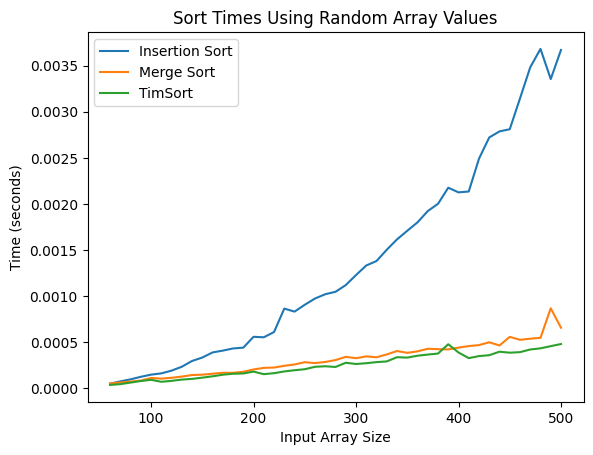

In [26]:
RunTest(1)

### Nearly Sorted Array

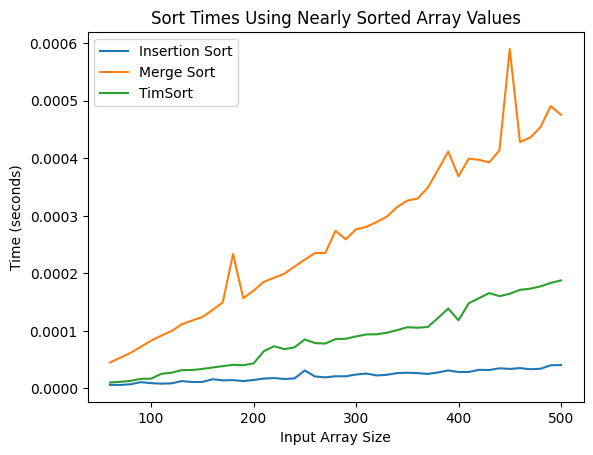

In [27]:
RunTest(2)

### Reverse Order Array

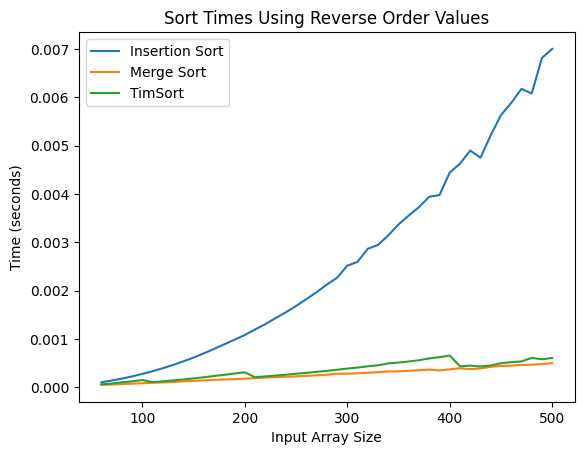

In [28]:
RunTest(3)

## Finding an Efficient Value of K for TimsSort

Is the tims sort optimal value different than the insertion sort value? Lets determine this with an experiment

We are going to use 3 different values of n, and testing different values of k.

We will use size n = 50, 100, 150 for our three tests.

In [29]:
def RedefinedTest(size, choice):

    timsX = []
    timsY = []

    if choice == 1:
        label = "Sort Times Using Random Array Values and Different K Values"
    
    if choice == 2:
        label = "Sort Times Using Nearly Sorted Array Values and Different K Values"

    if choice == 3:
        label = "Sort Times Using Reverse Order Values and Different K Values"
    
    
    repititions = 3000

    if choice == 1:
        x = GenerateRandomArray(size)
    
    if choice == 2:
        x = GenerateNearlySorted(size)
    
    if choice == 3:
        x = GenerateReverseArray(size)

    print(x) # Print the array we tested
    
    breakpoint = None
    #Run Tims Sort
    for k in range(size, 1, -1):
        timsX.append(k)
        timsAvg = 0
        for _ in range(repititions):
            timsCopy = copy.deepcopy(x)
            starttime = timeit.default_timer()
            res = TimSort(timsCopy, k) #Figure out a value of K
            endtime = timeit.default_timer() - starttime
            timsAvg += endtime
        
        timsY.append(timsAvg /  repititions)
        if not breakpoint:
            breakpoint = (timsX[-1], timsY[-1])

        elif timsY[-1] < breakpoint[1]:
            breakpoint = (timsX[-1], timsY[-1])


    plt.plot(timsX, timsY)
    if (breakpoint is not None):
        plt.plot(breakpoint[0], breakpoint[1], 'bo')
        plt.annotate(f'({breakpoint[0]}',xy=(breakpoint[0], breakpoint[1]))
    plt.legend(["Tims Sort"], loc="upper left")
    plt.xlabel("K value")
    plt.ylabel("Time (Seconds)")
    plt.title(label)

    plt.show()

# N = 150 Arrays

[79, 149, 140, 76, 86, 110, 139, 10, 13, 108, 63, 104, 47, 91, 109, 145, 41, 19, 130, 142, 128, 15, 26, 50, 36, 136, 74, 48, 38, 115, 42, 124, 92, 17, 75, 61, 71, 72, 62, 103, 29, 113, 89, 88, 44, 5, 2, 35, 12, 43, 99, 82, 122, 56, 28, 51, 1, 118, 112, 137, 14, 68, 95, 119, 81, 80, 54, 8, 18, 105, 49, 138, 69, 125, 78, 123, 9, 22, 25, 40, 39, 37, 4, 141, 143, 126, 121, 101, 106, 134, 20, 98, 53, 127, 57, 90, 111, 3, 32, 65, 21, 58, 148, 52, 66, 96, 100, 30, 11, 73, 77, 129, 60, 94, 64, 33, 24, 107, 34, 114, 70, 16, 120, 133, 84, 7, 55, 59, 147, 132, 144, 85, 0, 87, 102, 46, 23, 117, 83, 93, 135, 116, 6, 146, 45, 97, 31, 27, 131, 67]


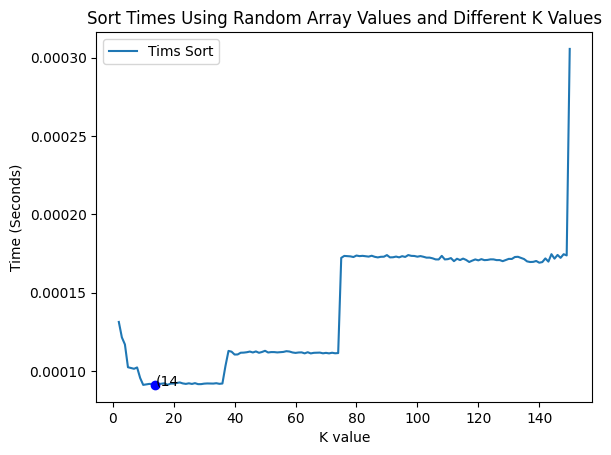

In [30]:
RedefinedTest(150, 1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 71, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]


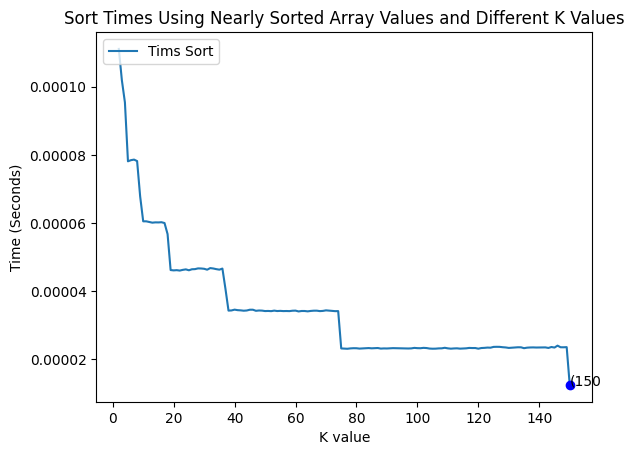

In [31]:
RedefinedTest(150, 2)

[149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


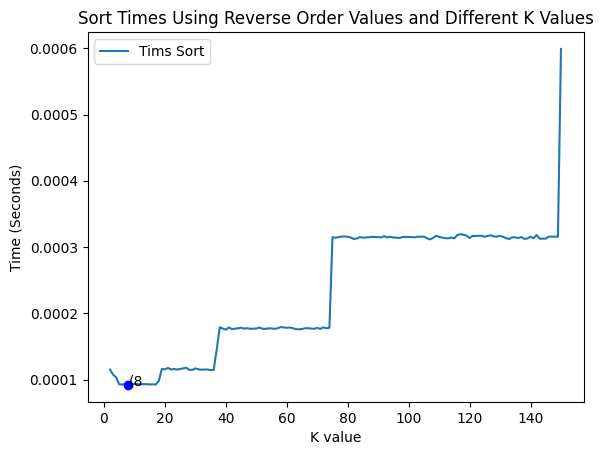

In [32]:
RedefinedTest(150, 3)

# N = 100 Arrays

[22, 70, 50, 17, 92, 44, 82, 76, 80, 84, 85, 3, 89, 60, 18, 58, 12, 68, 54, 1, 28, 11, 86, 21, 35, 9, 16, 96, 6, 31, 95, 25, 15, 59, 38, 2, 39, 94, 49, 65, 69, 10, 77, 33, 43, 47, 64, 73, 81, 45, 90, 57, 40, 30, 74, 71, 72, 14, 91, 62, 24, 41, 32, 36, 61, 66, 48, 23, 19, 37, 8, 27, 34, 97, 42, 87, 20, 56, 83, 26, 79, 55, 51, 75, 98, 46, 63, 53, 7, 99, 93, 88, 13, 29, 78, 52, 67, 5, 0, 4]


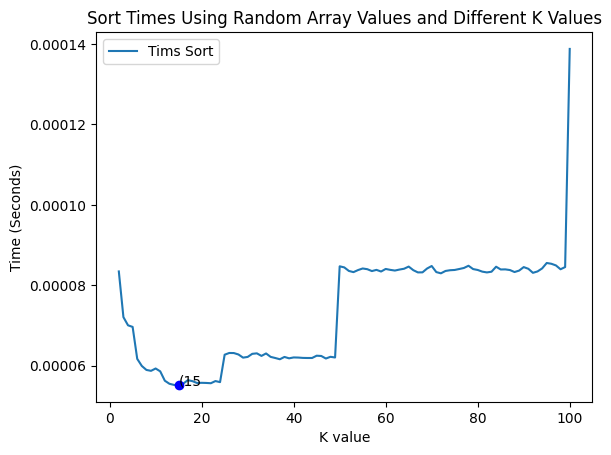

In [33]:
RedefinedTest(100, 1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 58, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


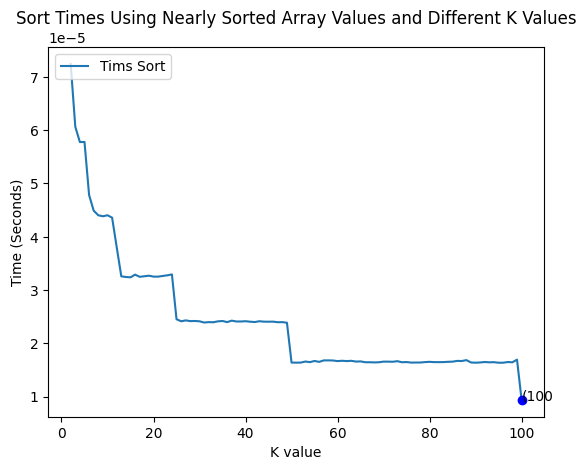

In [34]:
RedefinedTest(100, 2)

[99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


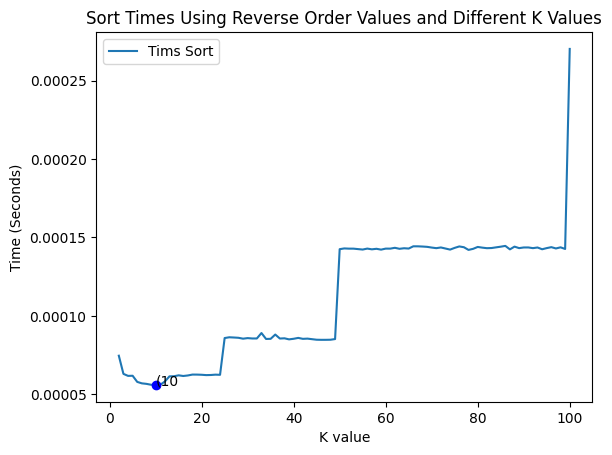

In [35]:
RedefinedTest(100, 3)

# N = 50 Arrays

[3, 0, 17, 40, 33, 7, 12, 35, 41, 45, 29, 39, 38, 20, 10, 34, 15, 16, 27, 25, 28, 46, 8, 49, 18, 23, 11, 43, 21, 1, 24, 13, 32, 30, 31, 42, 14, 4, 48, 26, 37, 44, 5, 9, 22, 19, 2, 6, 36, 47]


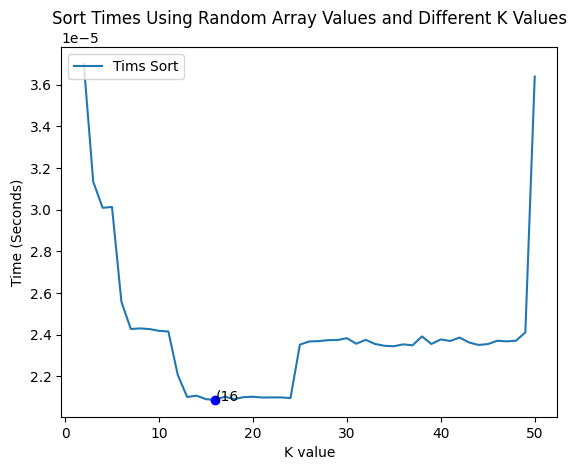

In [36]:
RedefinedTest(50, 1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 116]


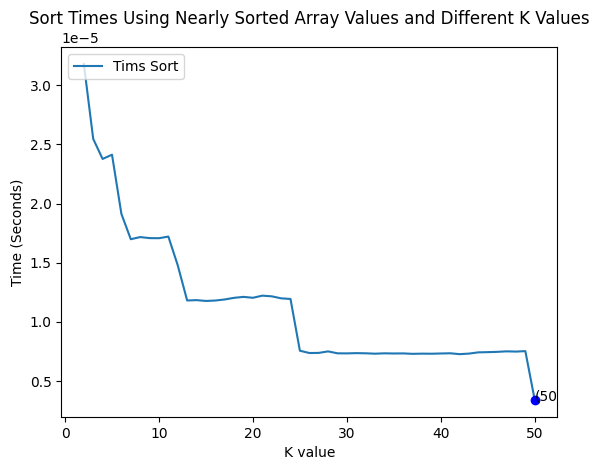

In [37]:
RedefinedTest(50, 2)

[49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


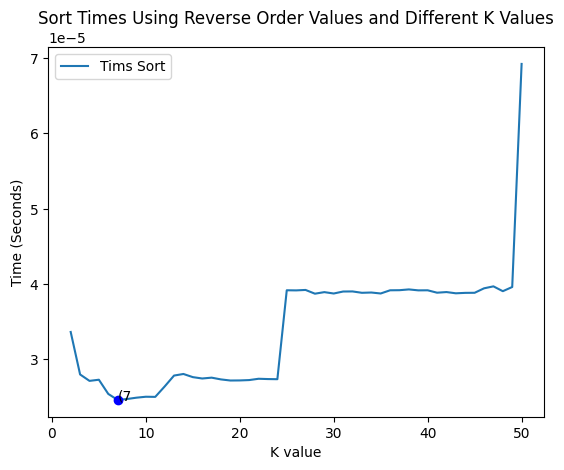

In [38]:
RedefinedTest(50, 3)